In [56]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pylab as pl
from scipy import stats
from sklearn.externals.six import StringIO
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
import matplotlib.pyplot as plt
import pydot

## import csv file

In [5]:
sample = pd.read_csv('data/data.csv')

## explore the data - descriptive statistics

In [9]:
sample.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,0,1,8286,1.0,0.0,1.0,0.0,63.0,1258.0,68.0
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,0,1,1842,3.0,0.0,1.0,2.0,198.0,786.0,37.0
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,0,1,8746,1.0,0.0,1.0,6.0,105.0,29.0,22.0
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,0,1,6210,3.0,1.0,1.0,2.0,198.0,1234.0,42.0
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,...,1,1,12812,5.0,0.0,1.0,2.0,50.0,368.0,83.0


In [11]:
print(sample['user_location_city'].nunique())

3366


In [12]:
print(sample.describe())

         Unnamed: 0     site_name  posa_continent  user_location_country  \
count  1.029300e+04  10293.000000    10293.000000           10293.000000   
mean   1.879374e+07      9.753133        2.685223              86.205674   
std    1.083868e+07     11.906390        0.743421              59.237926   
min    7.058000e+03      2.000000        0.000000               0.000000   
25%    9.390358e+06      2.000000        3.000000              66.000000   
50%    1.878925e+07      2.000000        3.000000              66.000000   
75%    2.813363e+07     14.000000        3.000000              70.000000   
max    3.766082e+07     53.000000        4.000000             238.000000   

       user_location_region  user_location_city  orig_destination_distance  \
count          10293.000000        10293.000000                6586.000000   
mean             306.252210        27502.130088                2022.719783   
std              204.892767        16716.445109                2287.924586   
min

In [13]:
print(sample['date_time'].min())
print(sample['date_time'].max())

2013-01-07 05:28:28
2014-12-31 22:53:12


In [14]:
print(sample.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10293 entries, 0 to 10292
Data columns (total 25 columns):
Unnamed: 0                   10293 non-null int64
date_time                    10293 non-null object
site_name                    10293 non-null int64
posa_continent               10293 non-null int64
user_location_country        10293 non-null int64
user_location_region         10293 non-null int64
user_location_city           10293 non-null int64
orig_destination_distance    6586 non-null float64
user_id                      10293 non-null int64
is_mobile                    10293 non-null int64
is_package                   10293 non-null int64
channel                      10293 non-null int64
srch_ci                      10285 non-null object
srch_co                      10285 non-null object
srch_adults_cnt              10293 non-null int64
srch_children_cnt            10293 non-null int64
srch_rm_cnt                  10293 non-null int64
srch_destination_id          10293 no

In [16]:
print(sample.dtypes)

Unnamed: 0                     int64
date_time                     object
site_name                      int64
posa_continent                 int64
user_location_country          int64
user_location_region           int64
user_location_city             int64
orig_destination_distance    float64
user_id                        int64
is_mobile                      int64
is_package                     int64
channel                        int64
srch_ci                       object
srch_co                       object
srch_adults_cnt                int64
srch_children_cnt              int64
srch_rm_cnt                    int64
srch_destination_id            int64
srch_destination_type_id     float64
is_booking                   float64
cnt                          float64
hotel_continent              float64
hotel_country                float64
hotel_market                 float64
hotel_cluster                float64
dtype: object


In [18]:
# unique counts
def unique_counts(sample):
    for i in sample.columns:
        count = sample[i].nunique()
        print(i, ": ", count)


In [19]:
# correlations
pd.crosstab(sample['is_booking'], sample['srch_rm_cnt'])
sample.groupby('srch_rm_cnt')['is_booking'].mean()
sample['srch_children_cnt'].corr(sample['is_booking'])
sample.corr()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
Unnamed: 0,1.000000,0.005184,0.000200,-0.008707,0.006139,0.004792,-0.002926,-0.003235,0.013444,-0.019079,...,-0.008414,-0.019182,0.002961,0.005711,-0.002147,0.012274,-0.001631,-0.004210,0.001928,-0.021239
site_name,0.005184,1.000000,-0.623418,0.178109,0.124614,-0.001865,0.035716,0.032875,-0.000567,0.038873,...,-0.039754,0.015565,0.035956,-0.012585,-0.001575,0.005638,0.196608,0.252161,-0.082039,-0.009966
posa_continent,0.000200,-0.623418,1.000000,0.170884,-0.026608,0.042622,0.048493,-0.013385,0.003832,-0.096124,...,0.028212,-0.030749,-0.014431,0.031016,0.008525,-0.014820,-0.319990,-0.148628,0.055337,-0.001508
user_location_country,-0.008707,0.178109,0.170884,1.000000,0.068495,0.124772,0.047138,-0.016321,-0.006045,-0.030329,...,0.023053,-0.002113,-0.000464,0.008955,0.032423,0.002954,-0.068234,0.103601,0.019422,-0.014264
user_location_region,0.006139,0.124614,-0.026608,0.068495,1.000000,0.130215,0.140471,0.011013,0.026419,0.037644,...,0.025065,-0.002121,0.040959,0.006225,-0.005314,-0.016480,0.034951,-0.046813,0.037933,-0.001842
user_location_city,0.004792,-0.001865,0.042622,0.124772,0.130215,1.000000,0.030935,-0.011292,-0.009580,0.000515,...,-0.015158,0.018418,0.011622,0.006142,0.000508,-0.016590,0.014925,0.021166,-0.007551,0.000127
orig_destination_distance,-0.002926,0.035716,0.048493,0.047138,0.140471,0.030935,1.000000,0.001345,-0.049884,0.029858,...,-0.061534,-0.013178,-0.041293,-0.041025,-0.038712,0.000238,0.421216,0.276397,-0.082823,0.004077
user_id,-0.003235,0.032875,-0.013385,-0.016321,0.011013,-0.011292,0.001345,1.000000,-0.006275,-0.036946,...,0.008479,-0.002619,0.004153,0.002253,0.018425,-0.001000,0.003813,0.001639,-0.000079,0.008843
is_mobile,0.013444,-0.000567,0.003832,-0.006045,0.026419,-0.009580,-0.049884,-0.006275,1.000000,0.060293,...,0.028225,-0.029805,-0.014845,0.005644,-0.028239,0.011742,-0.007872,-0.034108,0.011098,0.010567
is_package,-0.019079,0.038873,-0.096124,-0.030329,0.037644,0.000515,0.029858,-0.036946,0.060293,1.000000,...,-0.039487,-0.040333,-0.141127,-0.221083,-0.080038,0.120276,0.097123,-0.051977,-0.010081,0.033177


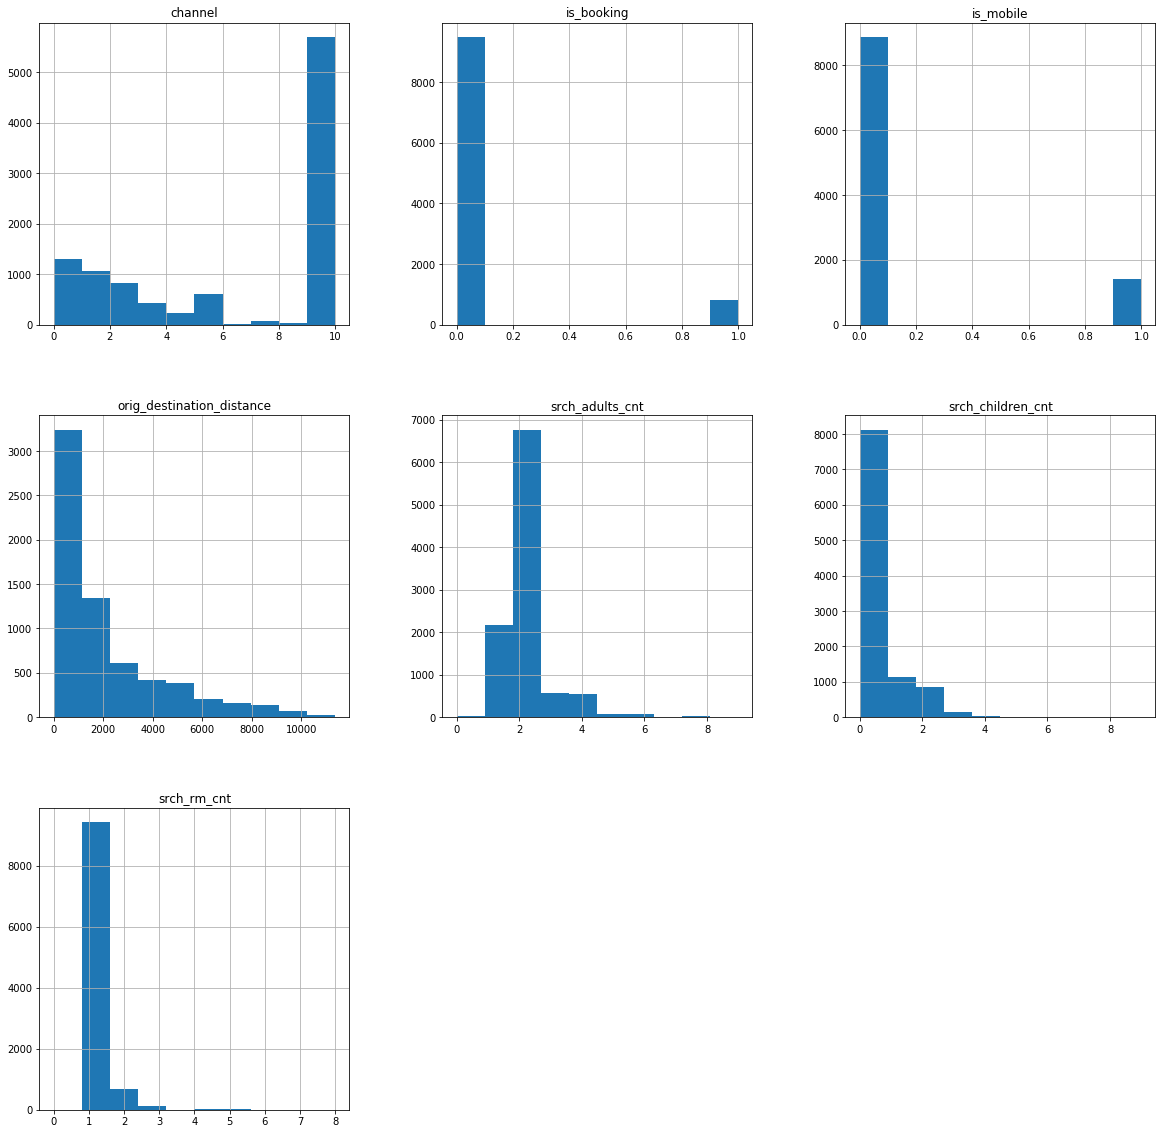

In [27]:
# sample.hist()
sample[['channel', 'is_booking', 'is_mobile', 'orig_destination_distance', 'srch_rm_cnt', 'srch_adults_cnt', 'srch_children_cnt']].hist(figsize=(20,20))
plt.show()

In [28]:
# distribution of number of booking attempts
sample.groupby('user_id')['is_booking']\
   .agg({'num_of_bookings':'count'}).reset_index()\
   .groupby('num_of_bookings')['user_id']\
   .agg('count')

sample = sample.merge(sample.groupby('user_id')['is_booking']
    .agg(['count']).reset_index())

/Users/vessilli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


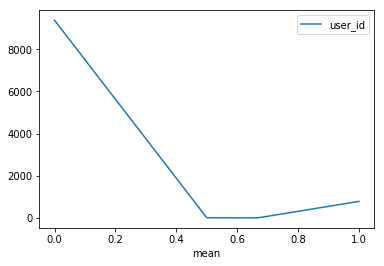

In [30]:
# distribution of booking rate
sample.groupby('user_id')['is_booking']\
   .agg(['mean']).reset_index()\
   .groupby('mean')['user_id']\
   .agg('count')

(sample.groupby('user_id')['is_booking']\
   .agg(['mean']).reset_index()\
   .groupby('mean')['user_id']\
   .agg('count').reset_index()).plot(x='mean', y='user_id')
plt.show()

## explore the data - validate data

In [32]:
#number of guests need to be > 0
pd.crosstab(sample['srch_adults_cnt'], sample['srch_children_cnt'])
sample.drop(sample[sample['srch_adults_cnt'] + sample['srch_children_cnt']==0].index)

sample['srch_co'] = pd.to_datetime(sample['srch_co'])
sample['srch_ci'] = pd.to_datetime(sample['srch_ci'])
sample['date_time'] = pd.to_datetime(sample['date_time'])
sample['date'] = pd.to_datetime(sample['date_time'].apply(lambda x: x.date()))

# Check-out date need to be later than check-in date;
# Check-in date need to be later than booking date

sample[sample['srch_co'] < sample['srch_ci']][['srch_co', 'srch_ci']]
sample[sample['srch_ci'] < sample['date']][['srch_ci', 'date']]

,srch_ci,date
5872,2014-01-05,2014-01-07


## explore the data - create new variables that might be useufl

In [33]:
def duration(row):
    delta = (row['srch_co'] - row['srch_ci'])/np.timedelta64(1, 'D')
    if delta <= 0:
        return np.nan
    else:
        return delta

def days_in_advance(row):
    delta = (row['srch_ci'] - row['date'])/np.timedelta64(1, 'D')
    if delta < 0:
        return np.nan
    else:
        return delta

sample['duration'] = sample.apply(duration, axis=1)
sample['days_in_advance'] = sample.apply(days_in_advance, axis=1)

## Outperforming/underperforming segments 

In [34]:
cat_list = ['site_name', 'posa_continent',
       'user_location_country', 'user_location_region',
       'user_location_city', 'channel',
       'srch_destination_id', 'srch_destination_type_id',
        'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster']

# for all columns
for i in cat_list:
    print(sample.groupby(i)['is_booking']
          .agg({'booking_rate': 'mean', 'num_of_bookings': 'sum'})
          .reset_index()
          .sort_values(by='booking_rate'))

# booking rate per channel
sample.groupby('channel')['is_booking']\
    .agg({'booking_rate': 'mean', 'num_of_bookings': 'sum'})\
    .reset_index()\
    .sort_values(by='booking_rate')

sample['is_booking'].mean()


    site_name  booking_rate  num_of_bookings
37         53      0.000000              0.0
15         21      0.000000              0.0
14         20      0.000000              0.0
13         19      0.000000              0.0
10         16      0.000000              0.0
29         35      0.000000              0.0
9          15      0.000000              0.0
32         38      0.000000              0.0
2           7      0.000000              0.0
1           6      0.000000              0.0
30         36      0.000000              0.0
36         48      0.000000              0.0
21         27      0.027778              1.0
26         32      0.037037              1.0
19         25      0.050000              3.0
3           8      0.051282             12.0
16         22      0.055556              2.0
22         28      0.062500              4.0
12         18      0.062500              5.0
18         24      0.064565             43.0
31         37      0.070746             37.0
7         

/Users/vessilli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()
/Users/vessilli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


0.0776331130975515

## Outperforming/underperforming segments - two sample t test

In [35]:
def stats_comparison(i):
    sample.groupby(i)['is_booking'].agg({
    'average': 'mean',
    'bookings': 'count'
    }).reset_index()
    cat = sample.groupby(i)['is_booking']\
        .agg({
            'sub_average': 'mean',
            'sub_bookings': 'count'
       }).reset_index()
    cat['overall_average'] = sample['is_booking'].mean()
    cat['overall_bookings'] = sample['is_booking'].count()
    cat['rest_bookings'] = cat['overall_bookings'] - cat['sub_bookings']
    cat['rest_average'] = (cat['overall_bookings']*cat['overall_average'] \
                     - cat['sub_bookings']*cat['sub_average'])/cat['rest_bookings']
    cat['z_score'] = (cat['sub_average']-cat['rest_average'])/\
        np.sqrt(cat['overall_average']*(1-cat['overall_average'])
            *(1/cat['sub_bookings']+1/cat['rest_bookings']))
    cat['prob'] = np.around(stats.norm.cdf(cat.z_score), decimals = 10)
    cat['significant'] = [(lambda x: 1 if x > 0.9 else -1 if x < 0.1 else 0)(i) for i in cat['prob']]
    print(cat)

stats_comparison('user_location_city')


      user_location_city  sub_average  sub_bookings  overall_average  \
0                      3     1.000000             1         0.077633   
1                      7     0.000000             1         0.077633   
2                     32     0.000000             3         0.077633   
3                     40     0.000000             2         0.077633   
4                     50     0.333333             3         0.077633   
5                     76     0.066667            30         0.077633   
6                     80     0.000000             1         0.077633   
7                     94     0.000000             2         0.077633   
8                    120     0.000000             1         0.077633   
9                    130     0.000000             2         0.077633   
10                   136     0.333333             3         0.077633   
11                   146     0.250000             4         0.077633   
12                   151     0.000000             2         0.07

/Users/vessilli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.
/Users/vessilli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':


## clustering - what are the similar user cities?

In [40]:
# Step 1: what are the features I am going to use (that make sense)?
# What features may distinguish cities? based on business sense and exploratory analysis

num_list = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']
city_data = sample.dropna(axis=0)[num_list + ['user_location_city']]
city_groups = city_data.groupby('user_location_city').mean().reset_index().dropna(axis=0)

# Step 2: shall I standardise the data?
# What is the magnitude of data range?

city_groups_std = city_groups.copy()
for i in num_list:
    city_groups_std[i] = preprocessing.scale(city_groups_std[i])

# Step 3: select clustering method and number of clusters
# The Elbow methods? choose a K so that the sum of the square error of the distances decrease drastically
# using an ad-hoc k=3 here, there are methods to help derive the optimal number for k

km = cluster.KMeans(n_clusters=3, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[num_list])

# Principal Component Analysis
pca = decomposition.PCA(n_components=2, whiten=True)
pca.fit(city_groups[num_list])
city_groups_std['x'] = pca.fit_transform(city_groups_std[num_list])[:, 0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[num_list])[:, 1]

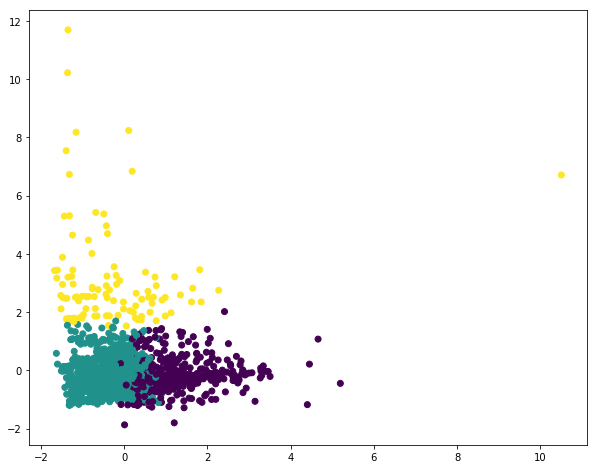

In [41]:
plt.figure(figsize=(10, 8))
plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.show()

In [37]:
# Step 4: profile the clusters
# merging the two dataframes based on a common column user_location_city
city_groups.merge(city_groups_std[['user_location_city', 'cluster']])\
    .groupby('cluster')\
    .mean() # for every column

# Step 5: assess the statistical robustness
# A statistically robust segmentation return similar results using different clustering methodologies

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
cluster,,,,,,,,,
0,27816.733871,4.953383,104.840680,2722.669074,0.170444,0.668342,1.975028,0.244479,1.034230
1,27694.516103,2.647818,37.831439,1592.064706,0.138739,0.093106,1.931009,0.382597,1.051444
2,28646.817308,3.554808,61.358173,1545.009144,0.105769,0.137821,3.957853,0.907212,2.246154


## decision tree - what lead to a higher chance of booking for individuals?

In [50]:
from sklearn.model_selection import train_test_split

# choose a cluster and split them into test and train
sample = sample.merge(city_groups_std[['user_location_city', 'cluster']], left_on='user_location_city', right_on='user_location_city', how='outer')
sample.groupby('cluster')['is_booking'].count()

# choose one of the city clusters to analyze
tree_data = sample.dropna(axis = 0)[sample['cluster']==2]
tree_train, tree_test = train_test_split(tree_data, test_size=0.2, random_state=1, stratify=tree_data['is_booking'])

# build the decision tree model
clf = tree.DecisionTreeClassifier(max_leaf_nodes=6, min_samples_leaf=200)
clf = clf.fit(tree_train[num_list], tree_train['is_booking'])

# test_preds = clf.predict(X = tree_test[num_list])
# clf.predict_proba(tree_test[num_list])

# scoring of the prediction model
clf.score(tree_test[num_list], tree_test['is_booking'])


/Users/vessilli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


0.9666666666666667

In [51]:
# visualize the decision tree
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names =['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt'], filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
# graph.write_pdf("booking_tree.pdf")

## Logistic regression - what lead to a higher chance of booking for individuals?

In [52]:
sample['channel'].value_counts()
sample['new_channel'] = [i if i in [9, 0, 1, 2] else 'other' for i in sample['channel']]
dummy_channels = pd.get_dummies(sample['new_channel'], prefix='channel')
sample = sample.join(dummy_channels.ix[:, :])
sample['log_orig_destination_distance'] = [np.log(i) for i in sample['orig_destination_distance']]

var_list = ['duration', 'days_in_advance', 'log_orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'channel_1',
            'channel_2', 'channel_9', 'channel_other']

# create logistic estimator
logit = sm.Logit(sample['is_booking'], sample[var_list], missing='drop')
result = logit.fit()
result.summary()

# convert logit to odds ratio
np.exp(result.params)
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
np.exp(conf)

# predicted values
sample['pred'] = result.predict(sample[var_list])

# plot variable VS. marketing_channel
sample.groupby('channel')['is_booking'].mean()


/Users/vessilli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


Optimization terminated successfully.
         Current function value: 0.275276
         Iterations 7


channel
0     0.065084
1     0.076707
2     0.058465
3     0.050228
4     0.126638
5     0.112561
6     0.000000
7     0.054054
8     0.083333
9     0.080175
10    0.333333
Name: is_booking, dtype: float64

/Users/vessilli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


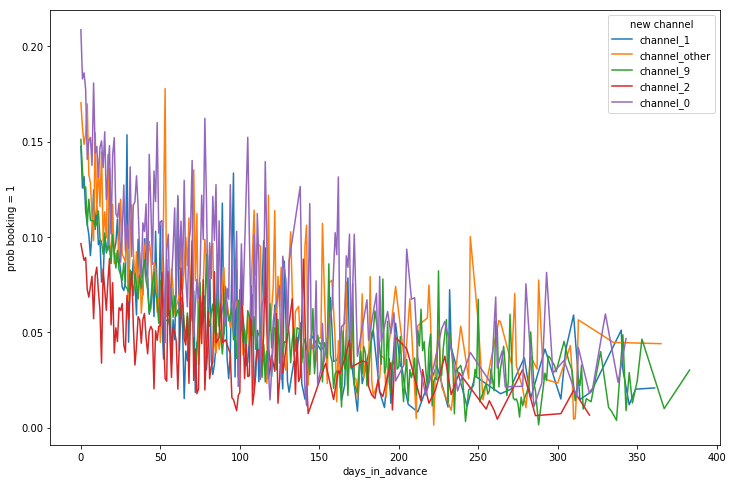

In [55]:
def plot_vs_marketing_channel(variable):
    grouped = pd.pivot_table(sample[(sample['pred'].isnull() == False)], values = ['pred'], index=[variable, 'new_channel'], aggfunc=np.mean)
    colors = 'rbgyrbgy'
    plt.figure(figsize=(12,8))
    for col in sample.new_channel.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['pred'])
    pl.xlabel(variable)
    pl.ylabel('prob booking = 1')
    pl.legend(['channel_'+str(i) for i in list(sample.new_channel.unique())], loc='upper right', title='new channel')
    # pl.show()
plot_vs_marketing_channel('days_in_advance')